In [1]:
import pandas as pd
import numpy as np

In [2]:
confirmed_global='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid19_confirmed=pd.read_csv(confirmed_global,index_col='Country/Region')
confirm_latest = covid19_confirmed.T.index.values[-1]

In [3]:
df_grouped_conf=covid19_confirmed.groupby('Country/Region').sum()
df_confirmed=(df_grouped_conf.sort_values(confirm_latest,ascending=False).
              head(10).drop(['Lat', 'Long'],axis=1).T)

In [4]:
death_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
covid19_death = pd.read_csv(death_global,index_col='Country/Region')
death_latest = covid19_death.T.index.values[-1]
df_grouped_death = covid19_death.groupby('Country/Region').sum()
df_death = (df_grouped_death.sort_values(death_latest, ascending=False).
           head(10).drop(['Lat', 'Long'], axis = 1).T)

In [5]:
recover_global = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
covid19_recover = pd.read_csv(recover_global,index_col='Country/Region')
recover_latest = covid19_recover.T.index.values[-1]
df_grouped_re = covid19_recover.groupby('Country/Region').sum()
df_recover = (df_grouped_re.sort_values(recover_latest, ascending=False).
           head(10).drop(['Lat', 'Long'], axis = 1).T)

In [22]:
df = df_confirmed

Country/Region,US,India,Brazil,France,Russia,Spain,Argentina,United Kingdom,Colombia,Italy
1/22/20,1,0,0,0,0,0,0,0,0,0
1/23/20,1,0,0,0,0,0,0,0,0,0
1/24/20,2,0,0,2,0,0,0,0,0,0
1/25/20,2,0,0,3,0,0,0,0,0,0
1/26/20,5,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11/6/20,9757612,8462080,5631181,1709716,1720063,1328832,1228814,1149791,1127733,862681
11/7/20,9886080,8507754,5653561,1709773,1740172,1328832,1236851,1174770,1136447,902490
11/8/20,9995860,8553657,5664115,1835187,1760420,1328832,1242182,1195350,1143887,935104
11/9/20,10115804,8591730,5675032,1856292,1781997,1381218,1250499,1216747,1149064,960373


In [24]:
df_time = pd.to_datetime(df.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
df = df.set_index(datetime_index)
df

Country/Region,US,India,Brazil,France,Russia,Spain,Argentina,United Kingdom,Colombia,Italy
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-11-06,9757612,8462080,5631181,1709716,1720063,1328832,1228814,1149791,1127733,862681
2020-11-07,9886080,8507754,5653561,1709773,1740172,1328832,1236851,1174770,1136447,902490
2020-11-08,9995860,8553657,5664115,1835187,1760420,1328832,1242182,1195350,1143887,935104
2020-11-09,10115804,8591730,5675032,1856292,1781997,1381218,1250499,1216747,1149064,960373


<AxesSubplot:>

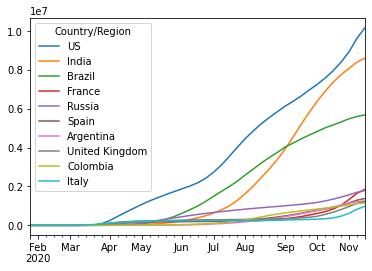

In [39]:
# countries with most confirmed cases
# Mean-resampled of confirmed COVID-19 cases in a weekly interval
df.resample('W').mean()
df.resample('W').mean().plot()

<AxesSubplot:>

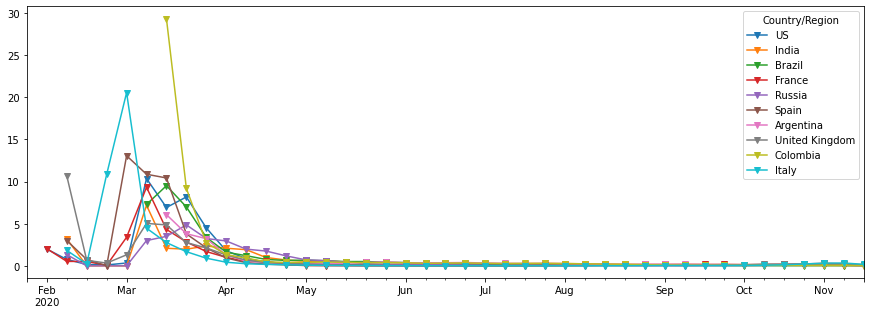

In [42]:
# the percentage growth of the confirmed COVID-19 cases
df.resample('W').mean().pct_change().plot(marker="v",figsize=(15,5))

<AxesSubplot:>

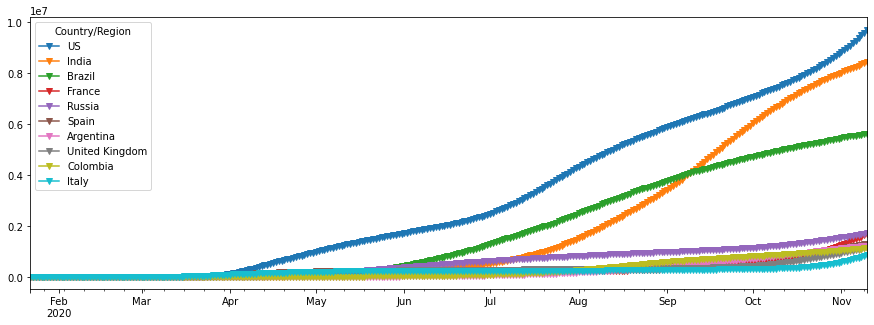

In [45]:
# the rolling average of confirmed COVID-19 cases by window size of 10 days
df.rolling('10D').mean().plot(marker="v",figsize=(15,5))

In [36]:
df_us = df.US.iloc[39:] # choose confirmed cases >30
df_us

2020-03-01          32
2020-03-02          55
2020-03-03          74
2020-03-04         107
2020-03-05         184
                ...   
2020-11-06     9757612
2020-11-07     9886080
2020-11-08     9995860
2020-11-09    10115804
2020-11-10    10252129
Name: US, Length: 255, dtype: int64

In [50]:
# try ARMA with the US data

from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(df_us, order=(6, 7))
model_fit = model.fit(disp=False)

# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.